# Comparing projections with different constraints

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import pyrcmip
import pyrcmip.database
import scmdata

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/database.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
import utils.plotting
import utils.rcmip

<IPython.core.display.Javascript object>

In [5]:
# setup matplotlib to save appropriately
utils.plotting.setup()

<IPython.core.display.Javascript object>

In [6]:
# setup matplotlib to save appropriately
utils.plotting.setup()

<IPython.core.display.Javascript object>

In [7]:
PAPER_DIR = os.path.join("..", "..", "paper")

<IPython.core.display.Javascript object>

In [8]:
DATA_DIR = os.path.join("..", "..", "data")

<IPython.core.display.Javascript object>

In [9]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [10]:
OUTPUT_DATABASE_HADCRUT5_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database-hadcrut5-target"
)
db_hadcrut5 = pyrcmip.database.Database(OUTPUT_DATABASE_HADCRUT5_DIR)
db_hadcrut5

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database-hadcrut5-target)>

<IPython.core.display.Javascript object>

In [11]:
!head {db._root_dir}/MAGICCv7.5.1/model_reported_metrics_MAGICCv7.5.1.csv

value,ensemble_member,RCMIP name,unit,climate_model
2.519245655826248,0,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.079749462843252,1,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.8881980959656763,2,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.3864501698878837,3,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.543022045157908,4,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.3689694189026107,5,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.86724886380814,6,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.757360198934998,7,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.6312479928323564,8,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1


<IPython.core.display.Javascript object>

In [12]:
!head {db_hadcrut5._root_dir}/MAGICCv7.5.1/model_reported_metrics_MAGICCv7.5.1.csv

value,ensemble_member,RCMIP name,unit,climate_model
2.3776527551869884,0,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.017755539601553,1,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.3838404566470675,2,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.8461022496945114,3,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.3256805221871866,4,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.0458196073990726,5,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.7524701983885818,6,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
3.4319410666694585,7,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1
2.1029199761531143,8,Equilibrium Climate Sensitivity,K,MAGICCv7.5.1


<IPython.core.display.Javascript object>

In [13]:
set(os.listdir(db_hadcrut5._root_dir))

{'EMGC', 'FaIRv2.0.0-alpha', 'MAGICCv7.5.1'}

<IPython.core.display.Javascript object>

In [14]:
set(os.listdir(db._root_dir))

{'Cicero-SCM',
 'EMGC',
 'FaIR1.6',
 'FaIRv2.0.0-alpha',
 'HadCRUT.4.6.0.0',
 'Hector',
 'MAGICCv7.5.1',
 'MCE-v1-2',
 'OSCARv3.1',
 'SCM4OPTv2.1',
 'climate_model_assessed_ranges_summary_table_all_results.csv',
 'oscar_quantiles_processed.csv',
 'vonshuckmann_et_al_2020'}

<IPython.core.display.Javascript object>

In [15]:
both_target_models = set(os.listdir(db_hadcrut5._root_dir)).intersection(
    set(os.listdir(db._root_dir))
)
both_target_models

{'EMGC', 'FaIRv2.0.0-alpha', 'MAGICCv7.5.1'}

<IPython.core.display.Javascript object>

In [16]:
def load_dat(db_load, target_constraining_source):
    out = scmdata.run_append(
        [
            db_load.load_data(
                climate_model=cm, variable=v, region="World", scenario="*ssp*"
            )
            for v in [
                "Surface Air Temperature Change",
            ]
            for cm in both_target_models
        ]
    ).filter(scenario=["*lowNTCF*", "ssp245-*"], keep=False)
    out["constraint"] = target_constraining_source

    return out

<IPython.core.display.Javascript object>

In [17]:
hadcrut4_dat = load_dat(db, "HadCRUT4")
hadcrut4_dat

Loading files:   0%|          | 0/24 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/30 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 142408, timepoints: 556)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	       climate_model constraint  ensemble_member           model region  \
	0       MAGICCv7.5.1   HadCRUT4                0     unspecified  World   
	1       MAGICCv7.5.1   HadCRUT4                1     unspecified  World   
	2       MAGICCv7.5.1   HadCRUT4                2     unspecified  World   
	3       MAGICCv7.5.1   HadCRUT4                3     unspecified  World   
	4       MAGICCv7.5.1   HadCRUT4                4     unspecified  World   
	...              ...        ...              ...             ...    ...   
	172403          EMGC   HadCRUT4              996  not_applicable  World   
	172404          EMGC   HadCRUT4              997  not_applicable  World   
	172405          EMGC   HadCRUT4              998  not_applicable  World   
	172406          EMGC   HadCRUT4              999  not_applicable  World   
	172407          EMGC   HadCRUT4           

<IPython.core.display.Javascript object>

In [18]:
hadcrut4_dat["climate_model"].unique()

array(['MAGICCv7.5.1', 'FaIRv2.0.0-alpha', 'EMGC'], dtype=object)

<IPython.core.display.Javascript object>

In [19]:
hadcrut5_dat = load_dat(db_hadcrut5, "HadCRUT5")
hadcrut5_dat

Loading files:   0%|          | 0/24 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


Loading files:   0%|          | 0/30 [00:00<?, ?it/s]

Loading files:   0%|          | 0/8 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 142408, timepoints: 556)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	       climate_model constraint  ensemble_member           model region  \
	0       MAGICCv7.5.1   HadCRUT5                0     unspecified  World   
	1       MAGICCv7.5.1   HadCRUT5                1     unspecified  World   
	2       MAGICCv7.5.1   HadCRUT5                2     unspecified  World   
	3       MAGICCv7.5.1   HadCRUT5                3     unspecified  World   
	4       MAGICCv7.5.1   HadCRUT5                4     unspecified  World   
	...              ...        ...              ...             ...    ...   
	172403          EMGC   HadCRUT5              996  not_applicable  World   
	172404          EMGC   HadCRUT5              997  not_applicable  World   
	172405          EMGC   HadCRUT5              998  not_applicable  World   
	172406          EMGC   HadCRUT5              999  not_applicable  World   
	172407          EMGC   HadCRUT5           

<IPython.core.display.Javascript object>

In [20]:
!ls {db_hadcrut5._root_dir}

EMGC  FaIRv2.0.0-alpha	MAGICCv7.5.1


<IPython.core.display.Javascript object>

In [21]:
all_dat = hadcrut4_dat.append(hadcrut5_dat)
all_dat

<scmdata.ScmRun (timeseries: 284816, timepoints: 556)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	       climate_model constraint  ensemble_member           model region  \
	0       MAGICCv7.5.1   HadCRUT4                0     unspecified  World   
	1       MAGICCv7.5.1   HadCRUT4                1     unspecified  World   
	2       MAGICCv7.5.1   HadCRUT4                2     unspecified  World   
	3       MAGICCv7.5.1   HadCRUT4                3     unspecified  World   
	4       MAGICCv7.5.1   HadCRUT4                4     unspecified  World   
	...              ...        ...              ...             ...    ...   
	284811          EMGC   HadCRUT5              996  not_applicable  World   
	284812          EMGC   HadCRUT5              997  not_applicable  World   
	284813          EMGC   HadCRUT5              998  not_applicable  World   
	284814          EMGC   HadCRUT5              999  not_applicable  World   
	284815          EMGC   HadCRUT5           

<IPython.core.display.Javascript object>

ssp245_HadCRUT4
ssp245_HadCRUT5


'../../paper/different-constraint-comparison_ssp245_1850-2020.pdf'

findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.
findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.


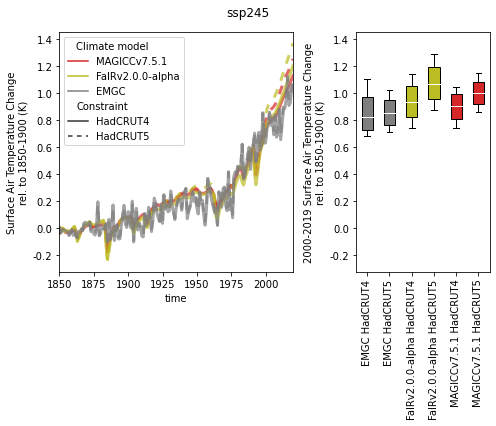

ssp119_HadCRUT4
ssp119_HadCRUT5


'../../paper/different-constraint-comparison_ssp119_1850-2100.pdf'

ssp119_HadCRUT4
ssp119_HadCRUT5


'../../paper/different-constraint-comparison_ssp119_2015-2300.pdf'

ssp126_HadCRUT4
ssp126_HadCRUT5


'../../paper/different-constraint-comparison_ssp126_1850-2100.pdf'

ssp126_HadCRUT4
ssp126_HadCRUT5


'../../paper/different-constraint-comparison_ssp126_2015-2300.pdf'

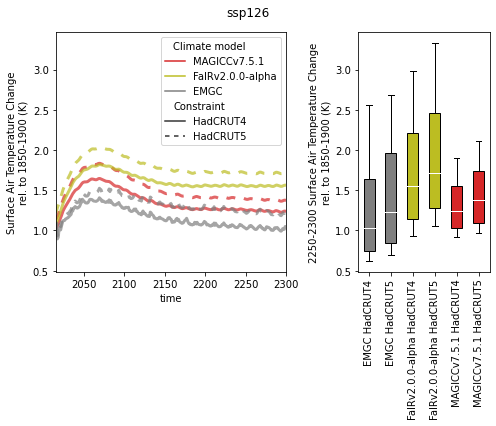

ssp245_HadCRUT4
ssp245_HadCRUT5


'../../paper/different-constraint-comparison_ssp245_1850-2100.pdf'

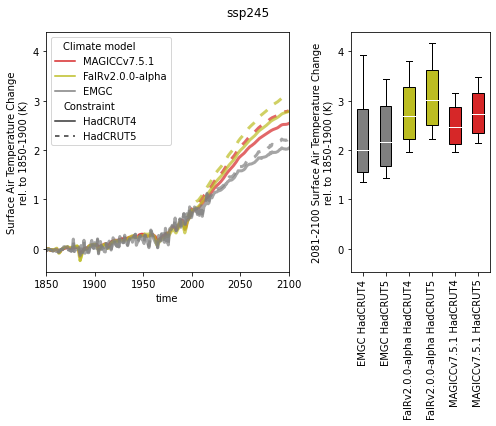

ssp245_HadCRUT4
ssp245_HadCRUT5


'../../paper/different-constraint-comparison_ssp245_2015-2300.pdf'

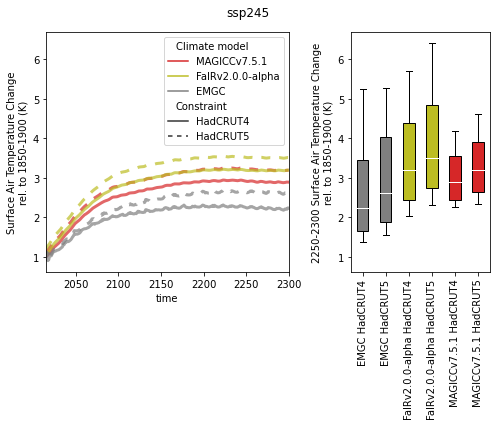

ssp370_HadCRUT4
ssp370_HadCRUT5


'../../paper/different-constraint-comparison_ssp370_1850-2100.pdf'

ssp370_HadCRUT4
ssp370_HadCRUT5


'../../paper/different-constraint-comparison_ssp370_2015-2300.pdf'

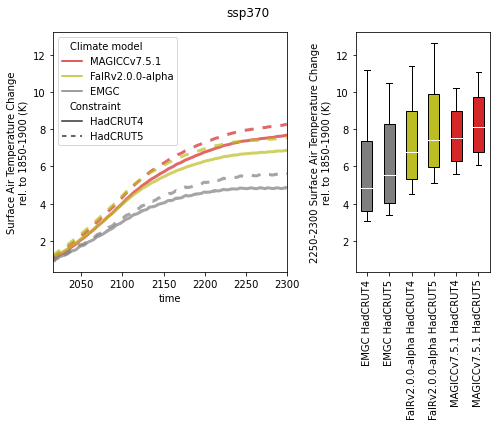

ssp434_HadCRUT4
ssp434_HadCRUT5


'../../paper/different-constraint-comparison_ssp434_1850-2100.pdf'

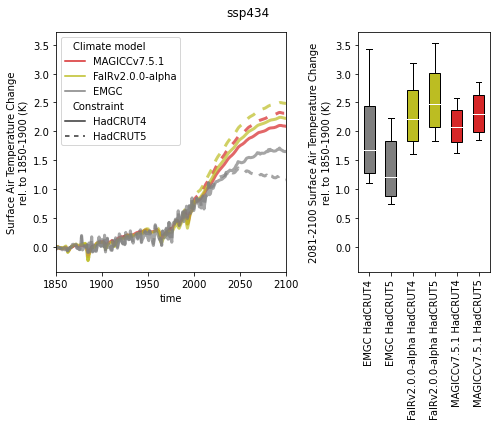

ssp434_HadCRUT4
ssp434_HadCRUT5


'../../paper/different-constraint-comparison_ssp434_2015-2300.pdf'

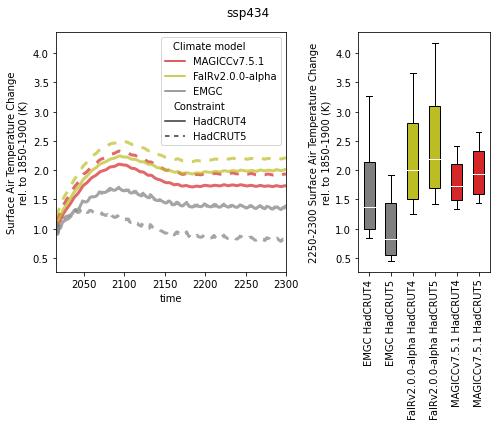

ssp460_HadCRUT4
ssp460_HadCRUT5


'../../paper/different-constraint-comparison_ssp460_1850-2100.pdf'

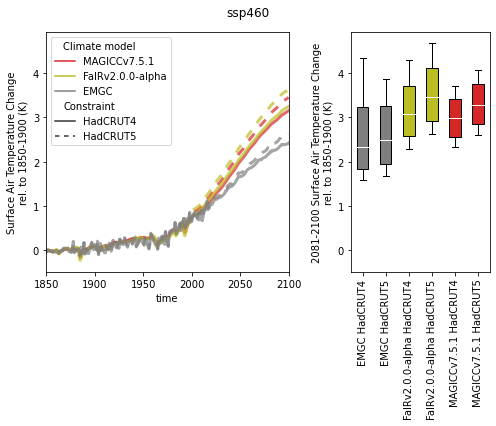

ssp460_HadCRUT4
ssp460_HadCRUT5


'../../paper/different-constraint-comparison_ssp460_2015-2300.pdf'

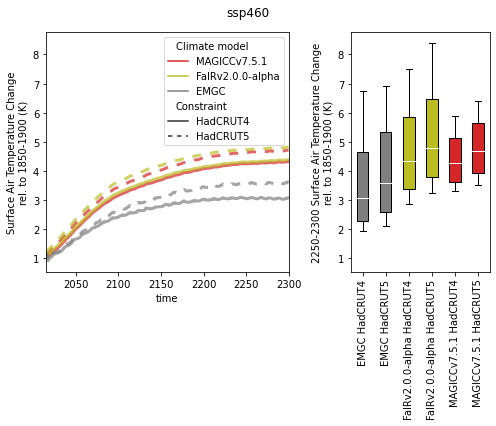

ssp585_HadCRUT4
ssp585_HadCRUT5


'../../paper/different-constraint-comparison_ssp585_1850-2100.pdf'

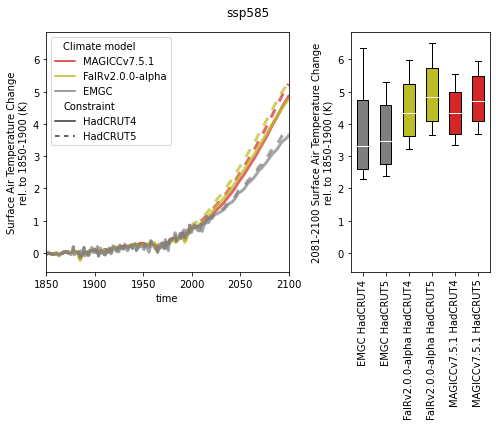

ssp585_HadCRUT4
ssp585_HadCRUT5


'../../paper/different-constraint-comparison_ssp585_2015-2300.pdf'

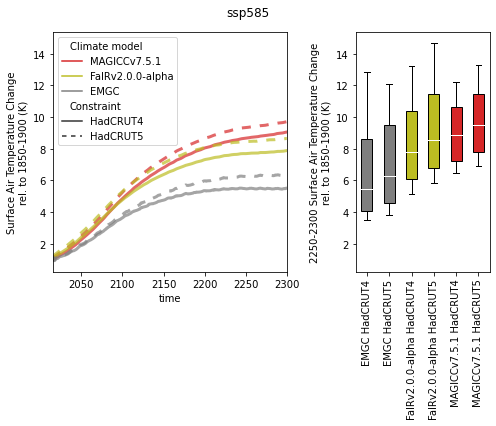

ssp534-over_HadCRUT4
ssp534-over_HadCRUT5


'../../paper/different-constraint-comparison_ssp534-over_1850-2100.pdf'

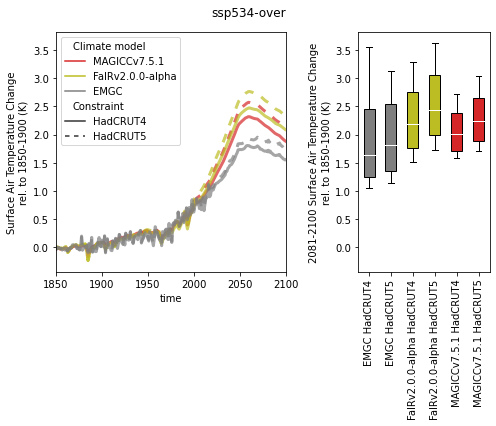

ssp534-over_HadCRUT4
ssp534-over_HadCRUT5


'../../paper/different-constraint-comparison_ssp534-over_2015-2300.pdf'

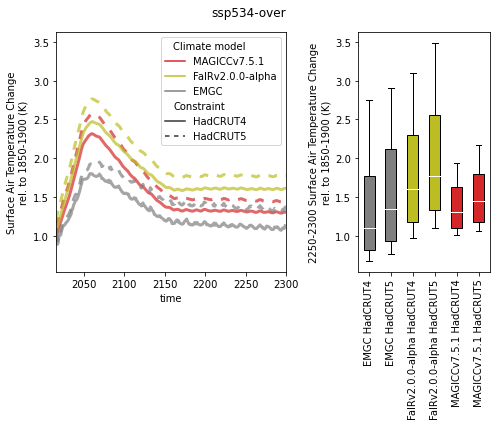

<IPython.core.display.Javascript object>

In [22]:
scenarios_ref_periods_eval_periods_plt_years_ylim = [
    (
        "ssp245",
        range(1850, 1900 + 1),
        range(2000, 2019 + 1),
        range(1850, 2020 + 1),
        None,
    ),
]

for scenario_to_plot in [
    "ssp119",
    "ssp126",
    "ssp245",
    "ssp370",
    "ssp434",
    "ssp460",
    "ssp585",
    "ssp534-over",
]:
    ylim = None
    scenarios_ref_periods_eval_periods_plt_years_ylim.append(
        (
            scenario_to_plot,
            range(1850, 1900 + 1),
            range(2081, 2100 + 1),
            range(1850, 2100 + 1),
            ylim,
        )
    )

    #     if scenario_to_plot = "ssp119":
    #         ylim =
    scenarios_ref_periods_eval_periods_plt_years_ylim.append(
        (
            scenario_to_plot,
            range(1850, 1900 + 1),
            range(2250, 2300 + 1),
            range(2015, 2300 + 1),
            ylim,
        )
    )

variable = "Surface Air Temperature Change"
unit = "K"
quantiles = [0.5]

palette = utils.plotting.CLIMATE_MODEL_PALETTE
hue = "Climate model"
hue_order = both_target_models
style = "Constraint"
dashes = {"HadCRUT4": "", "HadCRUT5": (3, 3)}

for (
    scenario,
    ref_period,
    eval_period_end,
    plt_years,
    ylim,
) in scenarios_ref_periods_eval_periods_plt_years_ylim:
    pdf = all_dat.filter(scenario=scenario, variable=variable)
    pdf["Climate model"] = pdf["climate_model"]
    pdf["Constraint"] = pdf["constraint"]

    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        gridspec_kw=dict(width_ratios=[1.75, 1]),
        sharey=True,
    )

    utils.plotting.make_ts_plot(
        axes[0],
        pdf,
        ref_period,
        quantiles,
        plt_years,
        palette,
        hue,
        hue_order,
        linewidth=3,
        alpha=0.7,
        process_over_columns=("ensemble_member",),
        set_ylabel=True,
        legend=True,
        style=style,
        dashes=dashes,
        size=None,
        sizes=None,
        units=None,
    )
    #     axes[0].set_ylabel("{} {}".format(scenario, axes[0].get_ylabel()))

    pdf_boxplot = pdf.copy()
    pdf_boxplot["scenario"] = pdf_boxplot["scenario"] + "_" + pdf_boxplot["constraint"]
    palette_boxplot = {}
    for i, (cm, constraint) in (
        pdf_boxplot.meta[["climate_model", "constraint"]].drop_duplicates().iterrows()
    ):
        key = "{} {}_{}".format(cm, scenario, constraint)
        palette_boxplot[key] = palette[cm]

    (
        box_plot_df_end_period,
        custom_ars,
        metric_name,
    ) = utils.plotting.calculate_custom_boxplot_ars_and_name_from_results(
        pdf_boxplot,
        variable,
        unit,
        pdf_boxplot.get_unique_meta("scenario"),
        eval_period=eval_period_end,
        ref_period=ref_period,
        eval_method="mean",
        region="World",
        include_assessed_pdf=False,
        include_oscar_custom=False,
    )
    box_plot_stats_end_period = (
        utils.plotting.get_box_whisker_stats_custom_quantiles_multi_scenario(
            custom_ars,
            box_plot_df_end_period,
            metric_name,
            box_quantiles=(17, 83),
            whisker_quantiles=(5, 95),
        )
    )
    utils.plotting.make_box_plot(axes[1], box_plot_stats_end_period, palette_boxplot)
    axes[1].tick_params(labelleft=True)
    axes[1].set_xticklabels(
        [
            str(v).split("'")[1].replace("{}_".format(scenario), "")
            for v in axes[1].get_xticklabels()
        ]
    )
    axes[1].set_ylabel(
        "{}-{} {}".format(eval_period_end[0], eval_period_end[-1], axes[0].get_ylabel())
    )

    if ylim is not None:
        axes[0].set_ylim(ylim)

    plt.suptitle(scenario)
    plt.tight_layout()

    out_file = os.path.join(
        PAPER_DIR,
        f"different-constraint-comparison_{scenario}_{plt_years[0]}-{plt_years[-1]}.pdf",
    )
    display(out_file)
    plt.savefig(out_file, **utils.plotting.SAVE_KWARGS)
    plt.show()
#     break